# 1.3 Sistemas trifásicos

## 1.3.1 Leyes de Kirchhoff
**Ley de corrientes de Kirchhoff:** En estado estacionario, la corriente de electrones que entra en el nodo de un circuito es igual a la corriente de electrones que sale de ese nodo.
$$
\sum I = 0
$$

**Ley de tensiones de Kirchhoff:** La suma de las caídas de tensiones alrededor de un circuito cerrado es igual a la suma de los aumentos de tensión del circuito.
$$
\sum \Delta V = 0
$$

## 1.3.2 Circuitos estrella estrella
Un circuito trifásico está balanceado si las impedancias son iguales y los fasores de las fuentes de tensión difieren solo en sus ángulos, con una diferencia de 120° entre cada par.

<img src="estrella-estrella.png" width=500px align="left">

Usando la admitancia $Y=1/Z$, tenemos:
$$
I_a = Y_a(E_a - V_{n n'}) \\
I_b = Y_b(E_b - V_{n n'}) \\
I_c = Y_c(E_c - V_{n n'}) \\
I_{n n'} = - Y_n V_{n n'}
$$
Aplicando la ley de las corrientes de Kircchoff:
$$
0 = Y_a E_a - Y_a V_{n n'} + Y_b E_b - Y_b V_{n n'} + Y_c E_c - Y_c V_{n n'} - Y_n V_{n n'} \\
V_{n n'} = \frac{Y_a E_a + Y_b E_b + Y_c E_c}{Y_a + Y_b + Y_c + Y_n}
$$

In [1]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Z_a = Z_b = complex(0,1)
Z_c = complex(0,0.9)
# Z_c = complex(0,1)
Z_l = complex(0,0.1)

In [3]:
E_a = complex(1,0)
E_b = complex(math.cos(math.radians(-120)), math.sin(math.radians(-120)))
E_c = complex(math.cos(math.radians(120)), math.sin(math.radians(120)))

In [4]:
Y_a = 1/(Z_l+Z_a)
Y_b = 1/(Z_l+Z_b)
Y_c = 1/(Z_l+Z_c)
Y_n = 1/Z_l

In [5]:
V_n = (Y_a*E_a + Y_b*E_b + Y_c*E_c) / (Y_a + Y_b + Y_c + Y_n)

In [6]:
print(f"La tensión por el neutro es: {cmath.polar(V_n)}")

La tensión por el neutro es: (0.007092198581560267, 2.0943951023931913)


In [7]:
I_a = Y_a*(E_a-V_n)
I_b = Y_b*(E_b-V_n)
I_c = Y_c*(E_c-V_n)

In [8]:
print(cmath.polar(I_a), cmath.polar(I_b), cmath.polar(I_c))

(0.9123317224491367, -1.576916571252421) (0.9123317224491367, 2.624114122449019) (0.9929078014184397, 0.5235987755982987)


In [9]:
print(f"I_a: {math.degrees(cmath.polar(I_a)[1])}")
print(f"I_b: {math.degrees(cmath.polar(I_b)[1])}")
print(f"I_c: {math.degrees(cmath.polar(I_c)[1])}")

I_a: -90.35066417700448
I_b: 150.3506641770045
I_c: 29.999999999999993


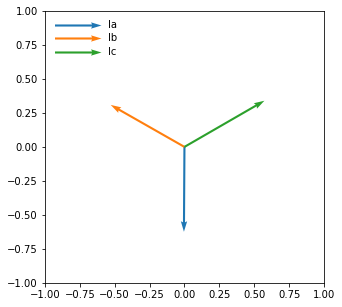

In [10]:
x0 = [0, 0, 0]
y0 = [0, 0, 0]
x1 = [I_a.real, I_b.real, I_c.real]
y1 = [I_a.imag, I_b.imag, I_c.imag]

fig, ax = plt.subplots(figsize = (5, 5))
q = ax.quiver(x0, y0, x1, y1,
              color=["tab:blue","tab:orange","tab:green"],
              scale = 3)

ax.quiverkey(q, X=0.2, Y=0.95, U=0.5, label="Ia", color="tab:blue",labelpos="E")
ax.quiverkey(q, X=0.2, Y=0.9, U=0.5, label="Ib", color="tab:orange",labelpos="E")
ax.quiverkey(q, X=0.2, Y=0.85, U=0.5, label="Ic", color="tab:green",labelpos="E")

ax.axis([-1, 1, -1, 1])
plt.show()

## 1.3.3 Circuitos estrella delta

<img src="estrella-delta.png" width=500px align="left">

Dado una configuración delta con una impedancia $Z_\Delta$, una configuración estrella con una impedancia $Z_Y=Z_\Delta/3$ tiene el mismo comportamiento en los terminales. Dado que el circuito está balanceado y no hay inductancia mutua entre las fases, podemos usar un análisis por fases.

<img src="estrella-delta2.png" width=300px align="left">

In [11]:
E_a = complex(1,0)
E_b = complex(math.cos(math.radians(-120)), math.sin(math.radians(-120)))
E_c = complex(math.cos(math.radians(120)), math.sin(math.radians(120)))

In [12]:
Z = 0.1j - 2j/3

In [13]:
I_l = E_a/Z
print(f"La corriente de línea es: {cmath.polar(I_l)}")

La corriente de línea es: (1.7647058823529411, 1.5707963267948966)


Para determinar la corriente por el delta, usamos la ley de tensiones de Kirchhoff:
$$
V_{ab} = V_{an} - V_{bn} \\
V_{ab} = V_{an} - V_{an} e^{-j2\pi/3} \\
V_{ab} = \sqrt{3} e^{j\pi/6} V_{an} \\
V_{ab} = \sqrt{3} V_{an} \angle 30°
$$

In [14]:
V_ab = math.sqrt(3)*E_a*complex(math.cos(math.radians(30)), math.sin(math.radians(30)))

In [15]:
I_ab = V_ab/(-2j)

In [16]:
print(f"La corriente por el delta es: {cmath.polar(I_ab)}")

La corriente por el delta es: (0.8660254037844386, 2.0943951023931953)


In [17]:
V_bc = math.sqrt(3)*E_b*complex(math.cos(math.radians(30)), math.sin(math.radians(30)))
V_ca = math.sqrt(3)*E_c*complex(math.cos(math.radians(30)), math.sin(math.radians(30)))

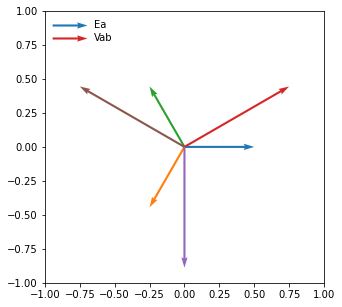

In [18]:
x0 = [0, 0, 0, 0, 0, 0]
y0 = [0, 0, 0, 0, 0, 0]
x1 = [E_a.real, E_b.real, E_c.real, V_ab.real, V_bc.real, V_ca.real]
y1 = [E_a.imag, E_b.imag, E_c.imag, V_ab.imag, V_bc.imag, V_ca.imag]

fig, ax = plt.subplots(figsize = (5, 5))
q = ax.quiver(x0, y0, x1, y1,
              color=["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"],
              scale = 4)

ax.quiverkey(q, X=0.15, Y=0.95, U=0.5, label="Ea", color="tab:blue",labelpos="E")
ax.quiverkey(q, X=0.15, Y=0.9, U=0.5, label="Vab", color="tab:red",labelpos="E")

ax.axis([-1, 1, -1, 1])
plt.show()